# DSCI 503 - PROJECT 4 

## Frederick Arko Larbi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Part 1: Loading the Dataset; Preliminary Analysis

In this section, we will load into a DataFrame, and will explore the structure of the data set.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


In [3]:
fc.shape

(15120, 13)

In [4]:
fc.loc[:, 'Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Creating a list of seven colors to be used as a palette in plots that you will create later.

In [8]:
palette = ['indianred', 'blueviolet', 'lightcoral', 'orange', 'gold', 'lightgreen', 'cornflowerblue']

# Part 2: Distribution of Cover Type by Wilderness Area

In this section, we will explore the relationship between cover type and wilderness area. We will start by determining the distribution of the wilderness areas within our dataset.

In [9]:
fc.loc[:, 'Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

In [10]:
ct_by_wa = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


We will visually represent the information in the DataFrame you just created in the form of a stacked bar chart.

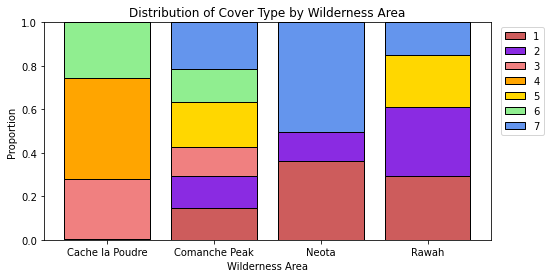

In [14]:
ct_by_wa_props = pd.DataFrame(ct_by_wa / np.sum(ct_by_wa))

bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8,4])
for i in range (0, len(ct_by_wa_props)):
    plt.bar(x = ct_by_wa_props.columns, height = ct_by_wa_props.iloc[i, : ], label = ct_by_wa_props.index[i], 
            color = palette[i], edgecolor = 'black', bottom = bb.iloc[i, :])

plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1.13, 1.0))
plt.show() 

# Part 3: Distribution of Cover Type by Soil Type

In this section, we will explore the relationship between cover type and soil type. We will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


We will visually represent the information in the DataFrame you just created in the form of a stacked bar chart.

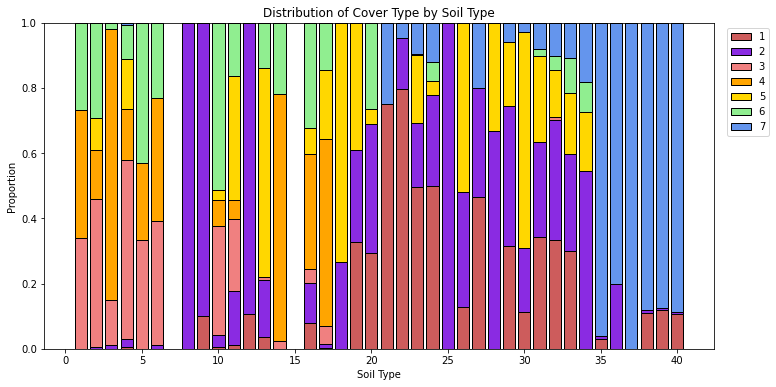

In [10]:
ct_by_st_props = pd.DataFrame(ct_by_st / np.sum(ct_by_st))

bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12,6])
for s in range (0, len(ct_by_st_props)):
    plt.bar(x = ct_by_st_props.columns, height = ct_by_st_props.iloc[s, : ], label = ct_by_st_props.index[s], 
            color = palette[s], edgecolor = 'black', bottom = bb.iloc[s, :])

plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1.09, 1.0))
plt.show()    

# Part 4: Distribution of Elevation by Cover Type

In this section, we will explore the relationship between cover type and elevation. We will start by calculating the average elevation for each of the seven cover types.

In [11]:
fc.loc[:, ['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


We will create histograms to visually explore the distribution of elevations for each of the seven cover types.

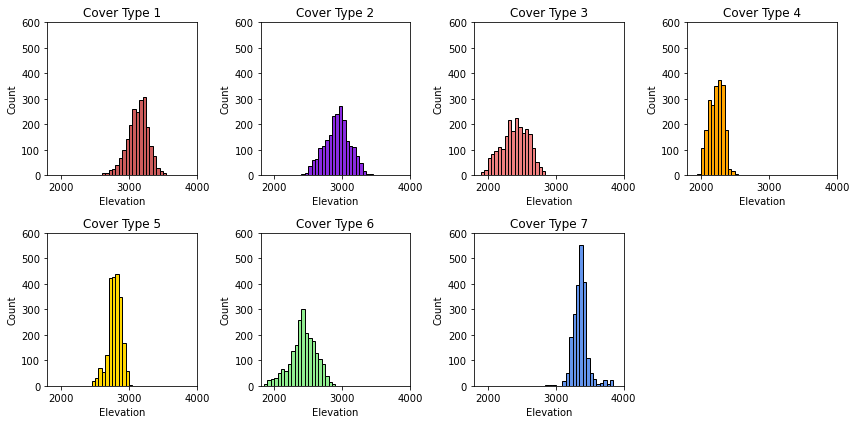

In [12]:
plt.figure(figsize=[12,6])

Cover_Type_range = range(0, 7)
for e in Cover_Type_range:
    
    plt.subplot(2, 4, 1 + e)
    plt.hist(fc.loc[fc.Cover_Type == 1 + e, 'Elevation'], color = palette[e], edgecolor='black', bins=np.arange(1800, 4050, 50))
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.title('Cover Type ' + str(1 + e))
plt.tight_layout()
plt.show()

# Part 5: Creating Training, Validation, and Test Sets

In this section, we will encode our categorical variables and will create training, validation, and test sets. We will start by separating the categorical features, the numerical features, and the labels.

In [13]:
X_num = fc.iloc[:, 0:9].values
X_cat = fc.iloc[:, [10,11]].values.astype('str')
y = fc.iloc[:, -1].values

print('Numerical Feature Array Shape:   ', X_num.shape)
print('Categorical Feature Array Shape: ', X_cat.shape)
print('Label Array Shape:               ', y.shape)

Numerical Feature Array Shape:    (15120, 9)
Categorical Feature Array Shape:  (15120, 2)
Label Array Shape:                (15120,)


We will now be encoding the categorical variables using one-hot encoding.

In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc   = encoder.transform(X_cat)

print('Encoded Feature Array Shape: ', X_enc.shape)

Encoded Feature Array Shape:  (15120, 42)


We will now combine the numerical features with the encoded features.

In [15]:
X = np.hstack([X_num, X_enc])
print('Feature Array Shape: ', X.shape)

Feature Array Shape:  (15120, 51)


We will now split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state=1, stratify=y_hold)

print('Training Features Shape:    ', X_train.shape)
print('Validation Features Shape:  ', X_valid.shape)
print('Test Features Shape:        ',X_test.shape)

Training Features Shape:     (10584, 51)
Validation Features Shape:   (2268, 51)
Test Features Shape:         (2268, 51)


# Part 6: Logistic Regression Model

In this section, we will create and evaluate a logistic regression model.

In [17]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none', multi_class='multinomial')
lr_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(lr_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(lr_mod.score(X_valid, y_valid),4))

Training Accuracy:   0.6177
Validation Accuracy: 0.6296


C:\Users\mmt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 7: Decision Tree Models
In this section, we will create and evaluate several decision tree models.

In [18]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,31)

for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
dt_idx = np.argmax(dt_valid_acc)

dt_opt_depth = depth_range[dt_idx]

tree = DecisionTreeClassifier(max_depth = dt_opt_depth)
tree.fit(X_train, y_train)

print('Optimal Value of max_depth:', dt_opt_depth)
print('Training Accuracy:         ', round(tree.score(X_train, y_train),4))
print('Validation Accuracy:       ', round(tree.score(X_valid, y_valid),4))


Optimal Value of max_depth: 23
Training Accuracy:          0.992
Validation Accuracy:        0.7637


We will plot the training and validation curves as a function of max_depth.

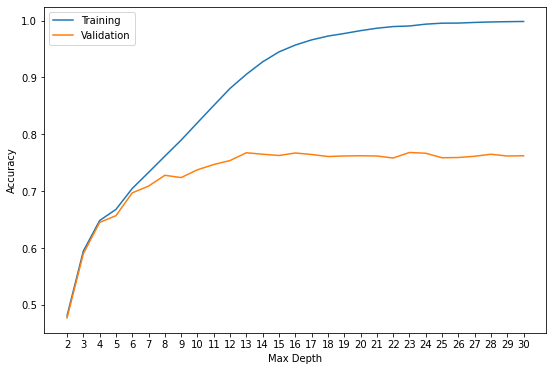

In [19]:
plt.figure(figsize=([9, 6]))

plt.plot(depth_range, dt_train_acc, label = 'Training')
plt.plot(depth_range, dt_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)

plt.legend()
plt.show()

# Part 8: Random Forest Models

In this section, we will create and evaluate several random forest models.

In [20]:
rf_train_acc = []
rf_valid_acc = []


for i in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=i)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]    
    
forest_mod = RandomForestClassifier(n_estimators=100, max_depth = rf_opt_depth)
forest_mod.fit(X_train, y_train)

print('Optimal Value of max_depth:', rf_opt_depth) 
print('Training Accuracy:         ', round(forest_mod.score(X_train, y_train),4))
print('Validation Accuracy:       ', round(forest_mod.score(X_valid, y_valid),4))   
    

Optimal Value of max_depth: 27
Training Accuracy:          1.0
Validation Accuracy:        0.8426


We will plot the training and validation curves as a function of max_depth.

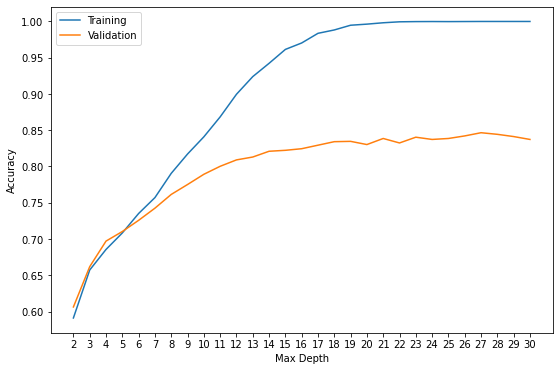

In [21]:
plt.figure(figsize=([9, 6]))

plt.plot(depth_range, rf_train_acc, label = 'Training')
plt.plot(depth_range, rf_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)

plt.legend()
plt.show()

# Part 9: Create and Evaluate Final Model

In this section, we will select our final model, and will evaluate it on the test set. For this final model evaluation, we will be using the random forest model as it appears to have the highest validation accuracy.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100, max_depth = rf_opt_depth)
final_model.fit(X_train, y_train)

print('Training Accuracy for Final Model:   ', round(final_model.score(X_train, y_train),4))
print('Validation Accuracy for Final Model: ', round(final_model.score(X_valid, y_valid),4))
print('Testing Accuracy for Final Model:    ', round(final_model.score(X_test, y_test),4))

Training Accuracy for Final Model:    1.0
Validation Accuracy for Final Model:  0.8466
Testing Accuracy for Final Model:     0.832


We will now create and display a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)

con = confusion_matrix(y_test, test_pred)
con_df = pd.DataFrame((con), columns = ['1', '2', '3', '4', '5', '6', '7'])
con_df

,1,2,3,4,5,6,7
0,221,67,2,0,9,0,25
1,61,230,7,0,14,9,3
2,0,1,248,22,3,50,0
3,0,0,8,309,0,7,0
4,1,15,4,0,299,5,0
5,0,1,41,11,2,269,0
6,13,0,0,0,0,0,311


We will now generate a classification report to provide further insight into the model's performance on the test set.

In [25]:
classification_report(y_test, test_pred)

'              precision    recall  f1-score   support\n\n           1       0.75      0.68      0.71       324\n           2       0.73      0.71      0.72       324\n           3       0.80      0.77      0.78       324\n           4       0.90      0.95      0.93       324\n           5       0.91      0.92      0.92       324\n           6       0.79      0.83      0.81       324\n           7       0.92      0.96      0.94       324\n\n    accuracy                           0.83      2268\n   macro avg       0.83      0.83      0.83      2268\nweighted avg       0.83      0.83      0.83      2268\n'